<H1> Changes in appearances of words in speeches between parties and congresses</H1> 


In this example we detect changes between two corpus of speeches taken from congressional records. This example shows you how to: 
- Load, arrange, and clean the data
- Compute p-values
- Use HC to detect changes

In [1]:
#load speech data
library(readr)
raw.corpus <- read_csv("../Data/speech_w_data_example.csv") 

Parsed with column specification:
cols(
  speech_id = col_integer(),
  date = col_integer(),
  congress_id = col_integer(),
  chamber = col_character(),
  party = col_character(),
  speech = col_character()
)


In [2]:
#select two units from raw corpus for comparison
library(tidyverse)

unit1 <- raw.corpus %>%
    filter(party == 'R', chamber == 'H', congress_id == 114) %>%   # (R)ebulican party (H)ouse speeches from 114th congress
    select(speech_id, speech)

unit2 <- raw.corpus %>%
    filter(party == 'D', chamber == 'H', congress_id == 114) %>%  # (D)emocratic party (H)ouse speeches from 114th congress
    select(speech_id, speech)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ ggplot2 3.0.0     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [9]:
#list of words to ignore
words_to_ignore = c('mr', 'unit','unanim', 'don', 'ask', 'presid','madam', 'american', 'make', 'nation',
               'let','last', 'urg', 'year', 'new', 'didn', 'dosen', 'bil', 'print', 'speaker', 'men',
                'side', 'yield', 'rank', 'rise', 'small', 'yet', 'yesterday', 'move', 'york', 'long', 
               'yes', 'xii', 'go', 'billion', 'republican', 'democrat', 'congress', 'iv','iiv', 'doesnt', 'cant',
                   'cannot', 'pelosi','weve','im','theyr', 'didnt', 'he', 'you', 'senat', 'hous', 'she',
                   'dont', 'got')

#other lists:
source("./word_lists.R") #file containing list of words
ignore_list = c(words_to_ignore, singletons, additional_words1, additional_words2, function_words)

In [10]:
# test differences between two test unit
source("./two_unit_test.R") #file containing test routine
HC <- two_unit_test(unit1, unit2, ignore_list)
max(HC$zz)
#67.1053824015321  suggest high difference in words used in speeches by each party

[1] 67.10538

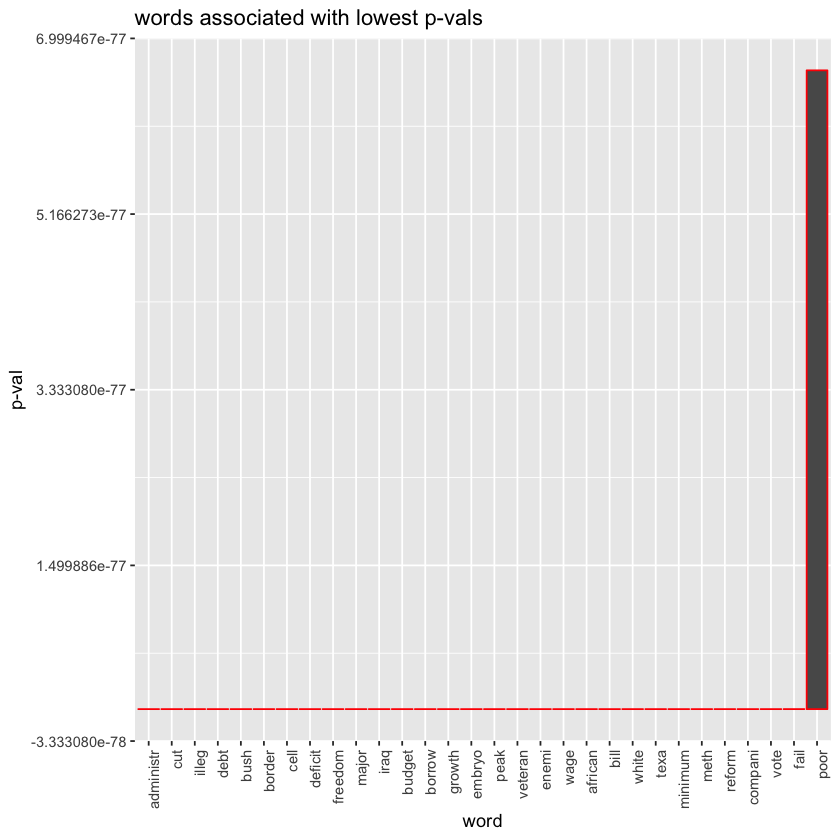

In [11]:
#which words cause the difference ? 
HC %>%
    top_n(-30, pp) %>%
    ggplot(aes(reorder(word, pp), pp)) + 
    geom_col(colour = 'red') + 
    ylab('p-val') +
    xlab('word') + 
    theme(axis.text.x = element_text(angle = 90, hjust = 1)) +
    ggtitle("words associated with lowest p-vals")

In [18]:
i.max.star <- which.max(HC$zz)

if (i.max.star == 1) {  #if i.max.star == 1 then remove this entry and compute again
    i.max.star <- which.max(HC$zz)
    i.max.star <- which.max(HC$zz[2:length(HC$zz)])+1
}
hc.star = HC$zz[i.max.star]
uu = HC$uu
zz = HC$zz


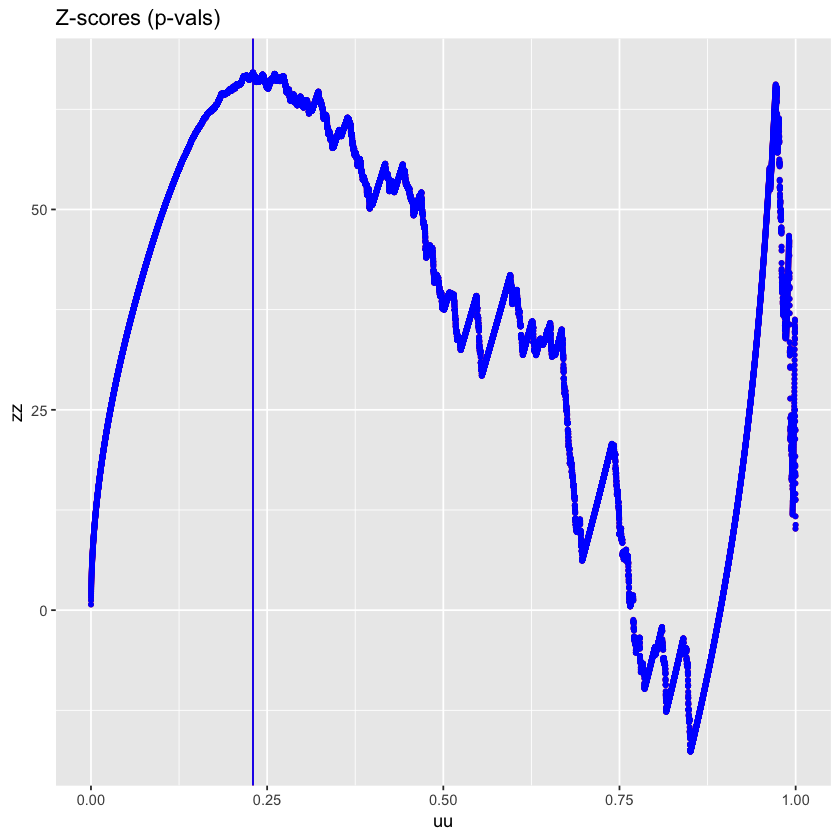

In [19]:
#show z scores of p-values used for HC
ggplot() +
  geom_point(data = HC, aes(uu, zz), colour = 'red', size = 1) +
    geom_vline(xintercept  = i.max.star/length(uu), colour = 'red') +
    geom_point(data = HC, aes(uu, zz), colour = 'blue', size = 1)+ 
    geom_vline(xintercept = i.max.star/length(uu), colour = 'blue') +
    geom_segment(x=0, y = hc.star, xend = i.max.star/length(uu), yend = hc.star, color = 'blue') +
    ggtitle("Z-scores (p-vals)") 